# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0))

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
# load pictures

#env
import os
import numpy as np
from scipy import ndimage
from IPython.display import display, Image
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
import tensorflow as tf
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
#python current dir
#picture dir
pic_dir=os.getcwd()
def getfolders(filedir):
    data_folders=[os.path.join(filedir,x) for x in sorted(os.listdir(filedir))]
    return data_folders
train_folders=getfolders(pic_dir+'/notMNIST_large')
test_folders=getfolders(pic_dir+'/notMNIST_small')

print(train_folders)
print(os.path.basename(train_folders[3]))

['/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/A', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/B', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/C', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/D', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/E', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/F', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/G', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/H', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/I', '/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/J']
D


In [4]:

#load letter
#image size
image_size=28
pixel_depth=225.0


def add_rows(dataset,label,i,l):
    dataset_one=np.ndarray(shape=(i+l,image_size,image_size),dtype=np.float32)
    dataset_one[0:i,:,:]=dataset[0:i]
    label_one=np.ndarray(shape=(i+l),dtype=np.int32)
    label_one[0:i]=label[0:i]
    return dataset_one,label_one

def loadpics(data_folders):
    num_images=0
    dataset=np.ndarray(shape=(num_images,image_size,image_size),dtype=np.float32)
    label=np.ndarray(shape=(num_images),dtype=np.int32)
    for folder in data_folders:
        image_files=os.listdir(folder)
        print(folder,num_images,len(image_files))
        dataset,label=add_rows(dataset,label,num_images,len(image_files))
        for image in image_files:
            image_file=os.path.join(folder,image)
            try:
                image_data=(ndimage.imread(image_file).astype(float)-pixel_depth/2)/pixel_depth
                label_data=ord(os.path.basename(folder))-ord('A')
                dataset[num_images,:,:]=image_data
                label[num_images]=label_data
                num_images+=1
            except IOError as e:
                print('it\'s ok')
    return dataset,label
        
train_datasets,train_labels=loadpics(train_folders)
test_datasets,test_labels=loadpics(test_folders)


('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/A', 0, 52912)
it's ok
it's ok
it's ok
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/B', 52909, 52912)
it's ok
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/C', 105820, 52912)
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/D', 158732, 52912)
it's ok
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/E', 211643, 52912)
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/F', 264555, 52912)
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/G', 317467, 52912)
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/H', 370379, 52912)
('/media/senlyu/My files/machine-learning/projects/digit_recognition/notMNIST_large/I', 423291, 52912)
('/media/senlyu/My files/machine-learni

In [4]:
#save for sure
pickle_file='save'

try:
    f=open(pickle_file,'wb')
    save={
        'train_datasets':train_datasets,
        'train_labels':train_labels,
        'test_datasets':test_datasets,
        'test_labels':test_labels
    }
    pickle.dump(save,f,pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('unable to save')
    raise

In [ ]:
### New start

In [4]:
#test save
pickle_file='save'
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_datasets=save['train_datasets']
  train_labels=save['train_labels']
  test_datasets=save['test_datasets']
  test_labels=save['test_labels']
  


In [5]:
#shuffle
def randomize(dataset,label):
    permutation = np.random.permutation(len(dataset))
    shuffled_dataset=dataset[permutation,:,:]
    shuffled_label=label[permutation]
    return shuffled_dataset,shuffled_label
train_datasets, train_labels = randomize(train_datasets, train_labels)
test_datasets, test_labels = randomize(test_datasets, test_labels)
print(train_labels[0:5])


['7' '9' '4' '4' '5']


7


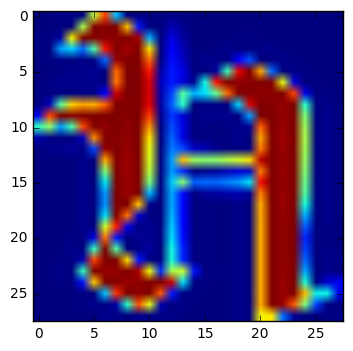

In [6]:

sample_num=0
sample_image=train_datasets[sample_num,:,:]
print(train_labels[sample_num])
plt.figure()
plt.imshow(sample_image)


In [7]:
#con
image_size=28
pixel_depth=225.0
print(len(test_labels),len(train_datasets))
train_size=100000
test_size=2000

def to5(dataset,label,size):
    new_dataset=np.ndarray(shape=(size,image_size,image_size*5),dtype=np.float32)
    new_label=np.ndarray(shape=(size,5),dtype=np.int32)
    for i in range(size):
        j=i*5
        new_dataset[i,:,0:image_size]=dataset[j,:,:]
        new_dataset[i,:,image_size:2*image_size]=dataset[j+1,:,:]
        new_dataset[i,:,2*image_size:3*image_size]=dataset[j+2,:,:]
        new_dataset[i,:,3*image_size:4*image_size]=dataset[j+3,:,:]
        new_dataset[i,:,4*image_size:5*image_size]=dataset[j+4,:,:]
        new_label[i,0]=int(label[j])
        new_label[i,1]=int(label[j+1])
        new_label[i,2]=int(label[j+2])
        new_label[i,3]=int(label[j+3])
        new_label[i,4]=int(label[j+4])
    return new_dataset,new_label

new_train_dataset,new_train_label=to5(train_datasets,train_labels,train_size)
new_test_dataset,new_test_label=to5(test_datasets,test_labels,test_size)


(18724, 529114)


In [8]:
print(new_test_dataset[1])
print(new_test_label[1])

[[-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        ..., -0.48666668 -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        ..., -0.5        -0.4911111  -0.5       ]
 ..., 
 [ 0.54444444  0.63333333  0.54444444 ..., -0.5        -0.4911111  -0.5       ]
 [ 0.13111112  0.63333333  0.27777779 ..., -0.4911111  -0.5        -0.5       ]
 [-0.41111112 -0.16666667 -0.29111111 ..., -0.5        -0.5        -0.5       ]]
[6 2 1 8 3]


In [52]:
#start to model
import tensorflow as tf

#set everything
image_xsize,image_ysize=28,28*5
num_labels=11
batch_size=50
patch_size=5
depth1=32
depth2=66
num_hidden1=1024

sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, image_xsize, image_ysize])
y_ = tf.placeholder(tf.float32, shape=[None, 5, num_labels])


In [53]:
# functions
def weight_variable(shape):
    init=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init)

def bias_variable(shape):
    init=tf.constant(0.1,shape=shape)
    return tf.Variable(init)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')



In [54]:
# construct CNN
# c1 : onvolution size : 5 * 5 * 1 * 32
# m2 : batch_size * 14 * (14) * 32
# c3 : convolution size : 5 * 5 * 1 * 64
# m4 : batch_size * 7 * (7) * 64
# d5 : Dropout
# f6 : weight size 7 * (7) * 64 * 1024
# o7 : softmax weight size : 1024 * 11

#set 5 clfs
o7w1=weight_variable([num_hidden1,num_labels])
o7w2=weight_variable([num_hidden1,num_labels])
o7w3=weight_variable([num_hidden1,num_labels])
o7w4=weight_variable([num_hidden1,num_labels])
o7w5=weight_variable([num_hidden1,num_labels])

o7b1=bias_variable([num_labels])
o7b2=bias_variable([num_labels])
o7b3=bias_variable([num_labels])
o7b4=bias_variable([num_labels])
o7b5=bias_variable([num_labels])




In [55]:
#model
def model(data, keep_prob):
    #c1
    w1 = weight_variable([5,5,1,32])
    b1 = bias_variable([32])
    x = tf.reshape(data, [-1,28,28*5,1])
    c1 = tf.nn.relu(conv2d(x,w1) + b1)
    #m2
    m2 = max_pool_2x2(c1)
    #c3
    w3 = weight_variable([5,5,32,66])
    b3 = bias_variable([66])
    c3 = tf.nn.relu(conv2d(m2,w3) + b3)
    #m4
    m4 = max_pool_2x2(c3)
    #d5
    #keep_prob = tf.placeholder(tf.float32)
    d5 = tf.nn.dropout(m4, keep_prob)
    #f6
    w6 = weight_variable([7*7*5*66,1024])
    b6 = bias_variable([1024])
    f6 = tf.nn.relu(tf.matmul(tf.reshape(d5,[-1,7*7*5*66]),w6)+b6)
    #o7
    
    logits0 = tf.matmul(f6, o7w1) + o7b1
    logits1 = tf.matmul(f6, o7w2) + o7b2
    logits2 = tf.matmul(f6, o7w3) + o7b3
    logits3 = tf.matmul(f6, o7w4) + o7b4
    logits4 = tf.matmul(f6, o7w5) + o7b5
    return [logits0,logits1,logits2,logits3,logits4]
    

In [56]:

def reformat(labels):

    y=labels
    
    y.reshape([-1,5,1])
    
    label = np.ndarray(shape=[len(y),5,11],dtype=np.int32)

    for i in range(len(y)):
        for j in range(5):
            for k in range(11):
                label[i,j,k] = ((k==y[i,j]).astype(np.float32))
    return label



#train_labels = reformat(train_labels)
#test_labels = reformat(test_labels)

In [72]:
[logits0,logits1,logits2,logits3,logits4]=model(x,0.95)



loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits0, y_[:,0])) +\
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits1, y_[:,1])) +\
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits2, y_[:,2])) +\
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits3, y_[:,3])) +\
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits4, y_[:,4]))


train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)  
sess.run(tf.global_variables_initializer())
for i in range(train_size/batch_size):
    labels=reformat(new_train_label[i*batch_size:(i*batch_size+batch_size),:])  
    train_step.run(feed_dict={x:new_train_dataset[i*batch_size:(i*batch_size+batch_size),:,:],y_:labels})      
    
    #test
    if i%5==0:
        print('step',i)
        test_size=100
        
        accuracya=[]
                
        correct_prediction0 = tf.equal(tf.argmax(logits0,1), tf.argmax(y_[:,0],1))
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction0, tf.float32)))
    
        correct_prediction1 = tf.equal(tf.argmax(logits1,1), tf.argmax(y_[:,1],1))
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction1, tf.float32)))
    
        correct_prediction2 = tf.equal(tf.argmax(logits2,1), tf.argmax(y_[:,2],1))
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction2, tf.float32)))
    
        correct_prediction3 = tf.equal(tf.argmax(logits3,1), tf.argmax(y_[:,3],1))
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction3, tf.float32)))
    
        correct_prediction4 = tf.equal(tf.argmax(logits4,1), tf.argmax(y_[:,4],1))
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction4, tf.float32)))
            
        for j in range(5):
            accuracy=accuracya[j]
            tslabels=reformat(new_test_label[0:batch_size,:])
            print('ac',j,accuracy.eval(feed_dict={x: new_test_dataset[0:batch_size], y_: tslabels}))
            
            
#train_step.run(feed_dict={x:new_train_dataset,y_:new_train_label})    
#x, y_ = new_train_dataset, new_train_label

('step', 0)
('ac', 0, 0.1)
('ac', 1, 0.039999999)
('ac', 2, 0.18000001)
('ac', 3, 0.1)
('ac', 4, 0.1)
('step', 5)
('ac', 0, 0.1)
('ac', 1, 0.1)
('ac', 2, 0.12)
('ac', 3, 0.1)
('ac', 4, 0.16)
('step', 10)
('ac', 0, 0.12)
('ac', 1, 0.02)
('ac', 2, 0.12)
('ac', 3, 0.12)
('ac', 4, 0.2)
('step', 15)
('ac', 0, 0.14)
('ac', 1, 0.1)
('ac', 2, 0.16)
('ac', 3, 0.18000001)
('ac', 4, 0.28)
('step', 20)
('ac', 0, 0.14)
('ac', 1, 0.14)
('ac', 2, 0.23999999)
('ac', 3, 0.1)
('ac', 4, 0.22)
('step', 25)
('ac', 0, 0.25999999)
('ac', 1, 0.14)
('ac', 2, 0.25999999)
('ac', 3, 0.12)
('ac', 4, 0.2)
('step', 30)
('ac', 0, 0.16)
('ac', 1, 0.079999998)
('ac', 2, 0.12)
('ac', 3, 0.12)
('ac', 4, 0.18000001)
('step', 35)
('ac', 0, 0.25999999)
('ac', 1, 0.059999999)
('ac', 2, 0.18000001)
('ac', 3, 0.16)
('ac', 4, 0.23999999)
('step', 40)
('ac', 0, 0.18000001)
('ac', 1, 0.039999999)
('ac', 2, 0.2)
('ac', 3, 0.14)
('ac', 4, 0.25999999)
('step', 45)
('ac', 0, 0.34)
('ac', 1, 0.16)
('ac', 2, 0.22)
('ac', 3, 0.18000001)

### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:** 

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:**

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:**

[7 9 4 4 5]
[[-0.5        -0.5        -0.4911111  ...,  0.61555558  0.63333333
  -0.00666667]
 [-0.5        -0.5        -0.5        ...,  0.61555558  0.63333333
   0.01555556]
 [-0.49555555 -0.5        -0.46444446 ...,  0.61555558  0.63333333
   0.03777778]
 ..., 
 [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        ..., -0.5        -0.5        -0.5       ]]


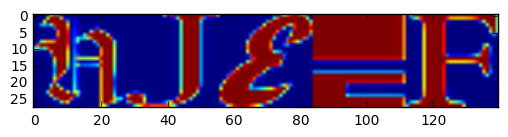

In [9]:
print(new_train_label[sample_num])
print(new_train_dataset[sample_num])
plt.figure()
plt.imshow(new_train_dataset[sample_num])

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
import scipy.io
# load pictures

#env
import os
import numpy as np
from scipy import ndimage
from IPython.display import display, Image
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
import tensorflow as tf
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

### Your code implementation goes here.
### Feel free to use as many code cells as needed.



In [2]:
pickle_file='SVHN_alldata.pickle'
with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    strain_datasets=save['train_dataset']
    strain_labels=save['train_label']
    stest_datasets=save['test_dataset']
    stest_labels=save['test_label']


In [12]:
strain_label=strain_labels.astype(np.int32)
stest_label=stest_labels.astype(np.int32)

#start to model
import tensorflow as tf
import time
#set everything
image_xsize,image_ysize=64,64
num_labels=11
batch_size=40
patch_size=5
depth1=32
depth2=200
num_hidden1=1024
num_hidden2=1024
num_hidden3=1024
num_hidden4=1024
image_size=64
pixel_depth=256
color_channel=3
train_size=33000
test_size=100

need_prediction=False

sess = tf.InteractiveSession()
#x, y_ = new_train_dataset, new_train_label
x = tf.placeholder(tf.float32, shape=[None, image_xsize, image_ysize,color_channel])
y_ = tf.placeholder(tf.int64, shape=[None, 5])

# functions
def weight_variable(shape):
    init=tf.truncated_normal(shape,stddev=0.05)
    return tf.Variable(init)

def bias_variable(shape):
    init=tf.constant(0.1,shape=shape)
    return tf.Variable(init)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


# construct CNN
# c1 : convolution size : 5 * 5 * 3 * 32
# m2 : batch_size * 32 * 32 * 32
# c3 : convolution size : 5 * 5 * 32 * 64
# m4 : batch_size * 16 * 16 * 64
# d5 : Dropout
# f6 : weight size 16 * 16 * 64 * 1024
# f7 : weight size 1024 * 128
# f8 : weight size 128 * 64
# o8 : softmax weight size : 64 * 11


o7w1=weight_variable([num_hidden2,num_labels])
o7w2=weight_variable([num_hidden2,num_labels])
o7w3=weight_variable([num_hidden2,num_labels])
o7w4=weight_variable([num_hidden2,num_labels])
o7w5=weight_variable([num_hidden2,num_labels])

o7b1=bias_variable([num_labels])
o7b2=bias_variable([num_labels])
o7b3=bias_variable([num_labels])
o7b4=bias_variable([num_labels])
o7b5=bias_variable([num_labels])

#model
def model(data, keep_prob):

    w1 = weight_variable([patch_size,patch_size,color_channel,depth1])
    b1 = bias_variable([depth1])
    c1 = conv2d(x,w1)+ b1
    
    m2 = max_pool_2x2(c1)
    t1 = tf.nn.relu(m2) 
    
    #c3
    w3 = weight_variable([patch_size,patch_size,depth1,depth2])
    b3 = bias_variable([depth2])
    c3 = conv2d(t1,w3) + b3
    #m4
    m4 = max_pool_2x2(c3)
    
    
    t3 = tf.nn.relu(m4)
    #d5
    #keep_prob = tf.placeholder(tf.float32)
    d5 = tf.nn.dropout(t3, keep_prob)
    
    #f6    
    w6 = weight_variable([16*16*depth2,num_hidden1])
    b6 = bias_variable([num_hidden1])
    f6 = tf.nn.relu(tf.matmul(tf.reshape(d5,[-1,16*16*depth2]),w6)+b6)
    #f7
    w7 = weight_variable([num_hidden1,num_hidden2])
    b7 = bias_variable([num_hidden2])
    f7 = tf.nn.relu(tf.matmul(tf.reshape(f6,[-1,num_hidden1]),w7)+b7)
    #f8
    #w8 = weight_variable([num_hidden2,num_hidden3])
    #b8 = bias_variable([num_hidden3])
    #f8 = tf.nn.relu(tf.matmul(tf.reshape(f7,[-1,num_hidden2]),w8)+b8)
    
    #f9
    #w9 = weight_variable([num_hidden3,num_hidden4])
    #b9 = bias_variable([num_hidden4])
    #f9 = tf.nn.relu(tf.matmul(tf.reshape(f8,[-1,num_hidden3]),w9)+b9)
    #o8
    
    logits0 = tf.matmul(f7, o7w1) + o7b1
    logits1 = tf.matmul(f7, o7w2) + o7b2
    logits2 = tf.matmul(f7, o7w3) + o7b3
    logits3 = tf.matmul(f7, o7w4) + o7b4
    logits4 = tf.matmul(f7, o7w5) + o7b5
    return [logits0,logits1,logits2,logits3,logits4]



[logits0,logits1,logits2,logits3,logits4]=model(x,0.9)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits0, y_[:,0])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits1, y_[:,1])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits2, y_[:,2])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits3, y_[:,3])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits4, y_[:,4]))

train_step = tf.train.AdamOptimizer(5e-6).minimize(loss)  
sess.run(tf.global_variables_initializer())
onetime=0
for i in range(train_size/batch_size):
      
    start=time.time()
    _,overallloss=sess.run([train_step,loss],feed_dict={x:strain_datasets[i*batch_size:(i*batch_size+batch_size),:,:,:],
                                                        y_:strain_label[i*batch_size:(i*batch_size+batch_size),:]})  
    end=time.time()
    onetime+=end-start
    #test
    if (i+1)%300==0 or i==(train_size/batch_size-1):
        print('step',i+1)
        print('Total loss',overallloss)
        print('Time cost',onetime)
        onetime=0
        test_size=100
        
        accuracya=[]    
        correct_prediction0 = tf.equal(tf.argmax(logits0,1), y_[:,0])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction0, tf.float32)))    
        correct_prediction1 = tf.equal(tf.argmax(logits1,1), y_[:,1])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction1, tf.float32)))    
        correct_prediction2 = tf.equal(tf.argmax(logits2,1), y_[:,2])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction2, tf.float32)))    
        correct_prediction3 = tf.equal(tf.argmax(logits3,1), y_[:,3])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction3, tf.float32)))    
        correct_prediction4 = tf.equal(tf.argmax(logits4,1), y_[:,4])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction4, tf.float32)))
        
        if need_prediction:
            predictiona=[]
            predictiona.append(logits0)
            predictiona.append(logits1)
            predictiona.append(logits2)
            predictiona.append(logits3)
            predictiona.append(logits4) 
                  
        
        for j in range(5):
            accuracy=accuracya[j]
            print('ac',j,accuracy.eval(feed_dict={x: stest_datasets[0:test_size,:,:,:],
                                                  y_: stest_label[0:test_size,:]}))
            if need_prediction:
                prediction=predictiona[j]
                print('pr',j,prediction.eval(feed_dict={x: stest_datasets[0:test_size,:,:,:],
                                                  y_: stest_label[0:test_size,:]}))
    
    
    if i==0:
        print('suc')     
    if i==(train_size/batch_size-1):
        print('finished')

suc
('step', 300)
('Total loss', 5.8469095)
('Time cost', 1006.8934438228607)
('ac', 0, 0.33000001)
('ac', 1, 0.20999999)
('ac', 2, 0.87)
('ac', 3, 0.99000001)
('ac', 4, 1.0)
('step', 600)
('Total loss', 6.5412922)
('Time cost', 1003.4090037345886)
('ac', 0, 0.33000001)
('ac', 1, 0.2)
('ac', 2, 0.87)
('ac', 3, 0.99000001)
('ac', 4, 1.0)
('step', 825)
('Total loss', 6.6910262)
('Time cost', 884.7838265895844)
('ac', 0, 0.33000001)
('ac', 1, 0.2)
('ac', 2, 0.87)
('ac', 3, 0.99000001)
('ac', 4, 1.0)
finished


### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

**Answer:**

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:**

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:**

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
pickle_file='SVHN_alldata.pickle'
with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    my_dataset=save['my_dataset']
    my_label=save['my_label']



In [9]:
for i in range(5):
    print(my_label[i])

[7 3 1 0 0]
[7 3 1 0 0]
[7 9 6 0 0]
[5 7 3 0 0]
[2 4 0 0 0]


In [13]:

prediction=tf.argmax(logits0,1)
print prediction.eval(feed_dict={x: my_dataset})
prediction=tf.argmax(logits1,1)
print prediction.eval(feed_dict={x: my_dataset})
prediction=tf.argmax(logits2,1)
print prediction.eval(feed_dict={x: my_dataset})
prediction=tf.argmax(logits3,1)
print prediction.eval(feed_dict={x: my_dataset})
prediction=tf.argmax(logits4,1)
print prediction.eval(feed_dict={x: my_dataset})

[1 1 1 1 1]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]


### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

**Answer:**



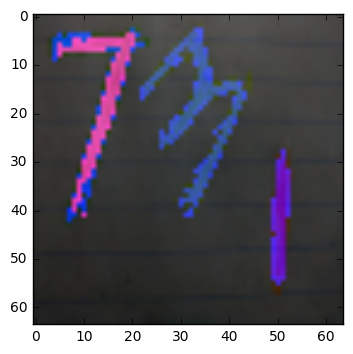

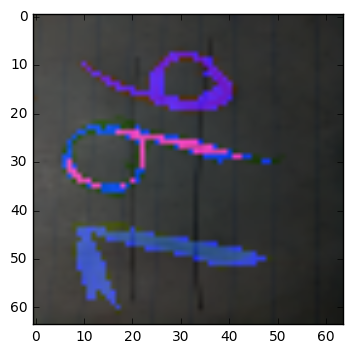

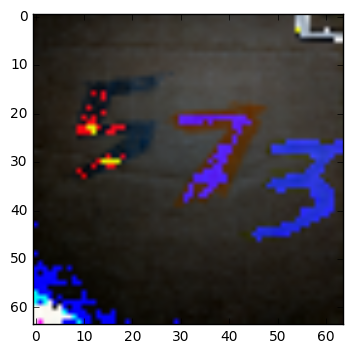

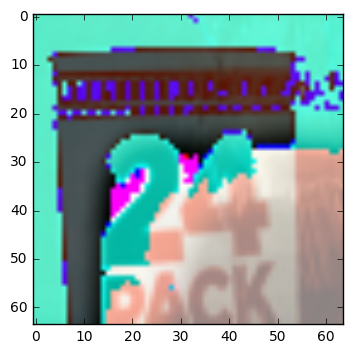

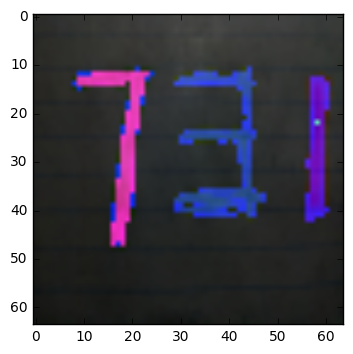

In [4]:
for i in range(5):
    plt.figure()
    plt.imshow(my_dataset[i])

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

**Answer:**

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
### Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
import scipy.io
# load pictures

#env
import os
import numpy as np
from scipy import ndimage
from IPython.display import display, Image
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
import tensorflow as tf
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

### Your code implementation goes here.
### Feel free to use as many code cells as needed.


In [2]:


### Your code implementation goes here.
### Feel free to use as many code cells as needed.

pickle_file='SVHN_alldata.pickle'
with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    strain_dataset=save['train_dataset']
    strain_labels=save['train_label']
    stest_dataset=save['test_dataset']
    stest_labels=save['test_label']
    strain_box=save['train_box']
    stest_box=save['test_box']
    smy_dataset=save['my_dataset']
    smy_labels=save['my_label']
    smy_box=save['my_box']
        

In [3]:

strain_label=strain_labels.astype(np.int32)
stest_label=stest_labels.astype(np.int32)
smy_label=smy_labels.astype(np.int32)


In [4]:
def regressions(y1,y,l):
    sums=0
    for i in range(l):
        sums+=(y1[i]-y[i])**2
    sumss=(1.0/l*sums)**0.5
    return sumss

In [5]:
#start to model
import tensorflow as tf
import time

image_xsize,image_ysize=64,64
num_labels1=11
batch_size=50
patch_size=5
depth1=32
depth2=200
num_hidden1=1024
num_hidden2=1024
image_size=64
pixel_depth=256
color_channel=3
train_size=33000
test_size=100
need_prediction=False
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, image_xsize, image_ysize,color_channel])
y_ = tf.placeholder(tf.int64, shape=[None, 5])
y_b = tf.placeholder(tf.float32, shape=[None, 5, 4])
# functions
def weight_variable(shape):
    init=tf.truncated_normal(shape,stddev=0.05)
    return tf.Variable(init)

def bias_variable(shape):
    init=tf.constant(0.1,shape=shape)
    return tf.Variable(init)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

o7w1=weight_variable([num_hidden2,num_labels1])
o7w2=weight_variable([num_hidden2,num_labels1])
o7w3=weight_variable([num_hidden2,num_labels1])
o7w4=weight_variable([num_hidden2,num_labels1])
o7w5=weight_variable([num_hidden2,num_labels1])
o7b1=bias_variable([num_labels1])
o7b2=bias_variable([num_labels1])
o7b3=bias_variable([num_labels1])
o7b4=bias_variable([num_labels1])
o7b5=bias_variable([num_labels1])

no7w=np.ndarray(shape=(5,4),dtype=np)
no7b=np.ndarray(shape=(5,4),dtype=np)
for i in range(5):
    for j in range(4):
        no7w[i,j]=weight_variable([num_hidden2,1])
        no7b[i,j]=bias_variable([1])

#model
def model(data, keep_prob):
    w1 = weight_variable([patch_size,patch_size,color_channel,depth1])
    b1 = bias_variable([depth1])
    c1 = conv2d(x,w1)+ b1  
    m2 = max_pool_2x2(c1)
    t1 = tf.nn.relu(m2) 
    w3 = weight_variable([patch_size,patch_size,depth1,depth2])
    b3 = bias_variable([depth2])
    c3 = conv2d(t1,w3) + b3
    m4 = max_pool_2x2(c3)
    t3 = tf.nn.relu(m4)
    d5 = tf.nn.dropout(m4, keep_prob)   
    w6 = weight_variable([16*16*depth2,num_hidden1])
    b6 = bias_variable([num_hidden1])
    f6 = tf.nn.relu(tf.matmul(tf.reshape(d5,[-1,16*16*depth2]),w6)+b6)
    w7 = weight_variable([num_hidden1,num_hidden2])
    b7 = bias_variable([num_hidden2])
    f7 = tf.nn.relu(tf.matmul(tf.reshape(f6,[-1,num_hidden1]),w7)+b7)   
  
    logits0 = tf.matmul(f7, o7w1) + o7b1
    logits1 = tf.matmul(f7, o7w2) + o7b2
    logits2 = tf.matmul(f7, o7w3) + o7b3
    logits3 = tf.matmul(f7, o7w4) + o7b4
    logits4 = tf.matmul(f7, o7w5) + o7b5
    nlogits=np.ndarray(shape=(5,4),dtype=np)
    for i in range(5):
        for j in range(4):
            nlogits[i,j]=tf.matmul(f7, no7w[i,j]) + no7b[i,j]    
    return logits0,logits1,logits2,logits3,logits4,nlogits

logits0,logits1,logits2,logits3,logits4,nlogits=model(x,0.90)

loss1 = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits0, y_[:,0])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits1, y_[:,1])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits2, y_[:,2])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits3, y_[:,3])) +\
tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits4, y_[:,4]))

loss=loss1
for i in range(5):
    for j in range(4):
        loss+=regressions(nlogits[i,j], y_b[:,i,j],batch_size)
los=loss[0]

train_step = tf.train.AdamOptimizer(1e-6).minimize(los)  
sess.run(tf.global_variables_initializer())
onetime=0
for i in range(train_size/batch_size):
#for i in range(2):
    start=time.time()
    _,overallloss,los1=sess.run([train_step,los,loss1],feed_dict={x:strain_dataset[i*batch_size:(i*batch_size+batch_size),:,:,:],
                                                        y_:strain_label[i*batch_size:(i*batch_size+batch_size),:],
                                                        y_b:strain_box[i*batch_size:(i*batch_size+batch_size),:]})  
    end=time.time()
    onetime+=end-start
    #test
    
    if i%300==0 :
        print('step',i)
        print('Total loss',overallloss)
        print('Loss1',los1)
        print('cost of time',onetime)
        onetime=0
        test_size=100
        
        accuracya=[]    
        correct_prediction0 = tf.equal(tf.argmax(logits0,1), y_[:,0])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction0, tf.float32)))    
        correct_prediction1 = tf.equal(tf.argmax(logits1,1), y_[:,1])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction1, tf.float32)))    
        correct_prediction2 = tf.equal(tf.argmax(logits2,1), y_[:,2])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction2, tf.float32)))    
        correct_prediction3 = tf.equal(tf.argmax(logits3,1), y_[:,3])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction3, tf.float32)))    
        correct_prediction4 = tf.equal(tf.argmax(logits4,1), y_[:,4])
        accuracya.append(tf.reduce_mean(tf.cast(correct_prediction4, tf.float32)))
        
        if need_prediction:
            predictiona=[]
            predictiona.append(logits0)
            predictiona.append(logits1)
            predictiona.append(logits2)
            predictiona.append(logits3)
            predictiona.append(logits4) 
                  
        
        for j in range(5):
            accuracy=accuracya[j]
            print('ac',j,accuracy.eval(feed_dict={x: stest_dataset[0:test_size,:,:,:],
                                                  y_: stest_label[0:test_size,:],
                                                  y_b:stest_box[0:test_size,:]}))
            
            if need_prediction:
                prediction=predictiona[j]
                print('pr',j,prediction.eval(feed_dict={x: stest_dataset[0:test_size,:,:,:],
                                                  y_: stest_label[0:test_size,:],
                                                  y_b:stest_box[0:test_size,:]}))
            
            
print('finish')

('step', 0)
('Total loss', 271.86032)
('Loss1', 22.445623)
('cost of time', 18.433182954788208)
('ac', 0, 0.1)
('ac', 1, 0.079999998)
('ac', 2, 0.02)
('ac', 3, 0.0)
('ac', 4, 0.16)
('step', 300)
('Total loss', 141.9682)
('Loss1', 7.5226026)
('cost of time', 1820.5126667022705)
('ac', 0, 0.30000001)
('ac', 1, 0.18000001)
('ac', 2, 0.85000002)
('ac', 3, 0.98000002)
('ac', 4, 0.97000003)
('step', 600)
('Total loss', 134.20612)
('Loss1', 6.8330331)
('cost of time', 1919.2203116416931)
('ac', 0, 0.13)
('ac', 1, 0.11)
('ac', 2, 0.83999997)
('ac', 3, 0.99000001)
('ac', 4, 1.0)
finish


### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**

My model cannot predict the localizer. And the classification results changes nothing.

In [6]:
sample_size=10
accuracya=np.ndarray(shape=(5,4),dtype=np)
for i in range(5):
    for j in range(4):
        accuracya[i,j]=regressions(nlogits[i,j], y_b[:,i,j],5)  
                                 
for i in range(5):
    for j in range(4):
        accuracy=accuracya[i,j]
        print('loss of localize',i,j,accuracy.eval(feed_dict={x: stest_dataset[0:sample_size,:,:,:],
                                                 y_: stest_label[0:sample_size,:],
                                                y_b:stest_box[0:sample_size,:]}))

('loss of localize', 0, 0, array([ 3.56255722], dtype=float32))
('loss of localize', 0, 1, array([ 4.73240852], dtype=float32))
('loss of localize', 0, 2, array([ 10.88922691], dtype=float32))
('loss of localize', 0, 3, array([ 11.15552616], dtype=float32))
('loss of localize', 1, 0, array([ 6.98122168], dtype=float32))
('loss of localize', 1, 1, array([ 8.35344219], dtype=float32))
('loss of localize', 1, 2, array([ 24.07758713], dtype=float32))
('loss of localize', 1, 3, array([ 29.87909317], dtype=float32))
('loss of localize', 2, 0, array([ 1.90622902], dtype=float32))
('loss of localize', 2, 1, array([ 4.39025116], dtype=float32))
('loss of localize', 2, 2, array([ 17.10554504], dtype=float32))
('loss of localize', 2, 3, array([ 12.33290863], dtype=float32))
('loss of localize', 3, 0, array([ 0.47003531], dtype=float32))
('loss of localize', 3, 1, array([ 0.43537393], dtype=float32))
('loss of localize', 3, 2, array([ 1.01830506], dtype=float32))
('loss of localize', 3, 3, array([

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

[0 0 0 0 0]


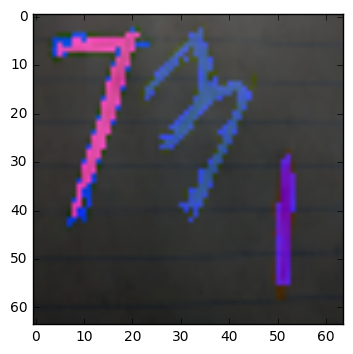

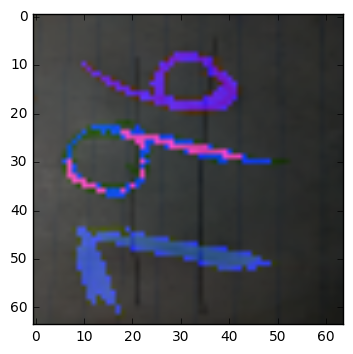

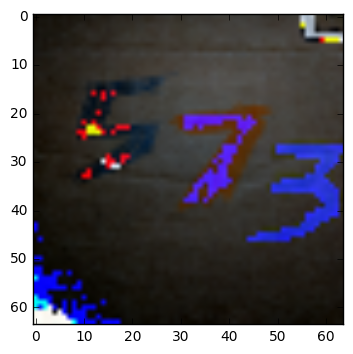

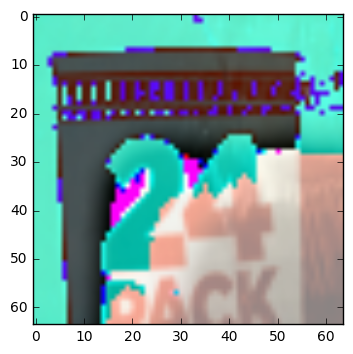

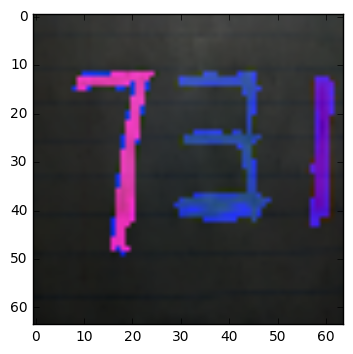

In [55]:
for i in range(5):
    plt.figure()
    plt.imshow(my_dataset[i])

In [7]:
predictiona=np.ndarray(shape=(5,4),dtype=np)
for i in range(5):
    for j in range(4):
        predictiona[i,j]=nlogits[i,j]
for i in range(5):
    for j in range(4):  
        prediction=predictiona[i,j]
        print('pr',i,j,prediction.eval(feed_dict={x: smy_dataset[0:5,:,:,:],
                                         y_: smy_label[0:5,:],
                                         y_b:smy_box[0:5,:]}))

('pr', 0, 0, array([[  8.88130569],
       [ 10.46026802],
       [  8.24504185],
       [ 10.19835758],
       [  8.41570663]], dtype=float32))
('pr', 0, 1, array([[  8.81845951],
       [  7.29917717],
       [  7.92857265],
       [ 11.12931538],
       [  8.69406128]], dtype=float32))
('pr', 0, 2, array([[ 23.22159195],
       [ 21.25856781],
       [ 21.22738457],
       [ 24.9476738 ],
       [ 20.3517971 ]], dtype=float32))
('pr', 0, 3, array([[ 37.70133209],
       [ 37.70246506],
       [ 35.50582886],
       [ 40.77904892],
       [ 37.44976425]], dtype=float32))
('pr', 1, 0, array([[ 7.62909031],
       [ 7.88720608],
       [ 6.98034239],
       [ 6.19408846],
       [ 6.74661541]], dtype=float32))
('pr', 1, 1, array([[  6.58425617],
       [  7.37158823],
       [  6.33711481],
       [ 11.92714119],
       [  8.32304001]], dtype=float32))
('pr', 1, 2, array([[ 23.72867775],
       [ 23.60822487],
       [ 23.72618294],
       [ 25.13714027],
       [ 24.59100914]], dtype=

**Answer:**

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:


### Your optional code implementation goes here.
### Feel free to use as many code cells as needed.



### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.